In [1]:
#Building neural network model
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow import keras
from keras.layers import Dense,Input,LeakyReLU
from keras.models import Sequential
#from keras.callbacks import LambdaCallback
from keras.utils import to_categorical
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def neural_network(data,out_var,in_neurons,hidden_neurons,epoch,batch_size):
    #Splitting the data into input and output
    x = data.drop(out_var,axis=1)
    y = data[out_var]
    
    #splitting the data into train and test
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
    
    neural_network_model(x_train,x_test,y_train,y_test,in_neurons,hidden_neurons,epoch,batch_size)

#defining neural network model
def neural_network_model(x_train,x_test,y_train,y_test,in_neurons,hidden_neurons,epoch,batch_size): 
    act = ['tanh','relu','softplus','selu','elu','exponential',LeakyReLU(alpha=0.01)]
    df = []
    acc = []
    inp = []
    
    for i in tqdm(range(0,len(act))):
        #creating the model
        model = Sequential()
        #input layer
        model.add(Dense(units=in_neurons,input_dim=x_train.shape[1],kernel_initializer='uniform',activation=act[i],name='input_layer'))
        #1st hidden layer
        model.add(Dense(units=hidden_neurons,kernel_initializer='uniform',activation=act[i],name='hidden_layer'))
        #output layer
        model.add(Dense(units=to_categorical(y_train).shape[1],activation='softmax',name='output_layer'))

        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        #to print the weights after each epoch
        #print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

        # Fit the model
        history = model.fit(x_train, to_categorical(y_train), validation_data=(x_test,to_categorical(y_test)), epochs=epoch, batch_size=batch_size,verbose=0)
        
        inp.append([model])
        df.append(history)
        acc.append(max(history.history['accuracy']))
    
    #printing summary of trained neural network
    print(model.summary())
    
    res = pd.DataFrame({'Activation_Function':act,'Accuracy':acc})
    res.Activation_Function[6] = 'LeakyRelu'
    print('Best Activation function is {} with accuracy of {}'.format(res.Activation_Function[res.Accuracy.idxmax()],max(res.Accuracy)))
    
    #calculating f1_score
    y_pred = model.predict(x_test)
    print('F1_score for model with AF = {} is {}'.format(res.Activation_Function[res.Accuracy.idxmax()],f1_score(y_test,np.argmax(y_pred,axis=1),average='weighted')))
    
    #creating subplots and fixing the figure size
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    
    # summarize history for accuracy
    axes[0].plot(df[res.Accuracy.idxmax()].history['accuracy'])
    axes[0].plot(df[res.Accuracy.idxmax()].history['val_accuracy'])
    axes[0].set(xlabel='epoch', ylabel='accuracy')
    axes[0].set_title('model accuracy for AF - {}'.format(res.Activation_Function[res.Accuracy.idxmax()]))
    axes[0].legend(['train', 'test'])

    # summarize history for loss
    axes[1].plot(df[res.Accuracy.idxmax()].history['loss'])
    axes[1].plot(df[res.Accuracy.idxmax()].history['val_loss'])
    axes[1].set(xlabel='epoch', ylabel='loss')
    axes[1].set_title('model loss for AF - {}'.format(res.Activation_Function[res.Accuracy.idxmax()]))
    axes[1].legend(['train', 'test'])
    plt.show()
    
    #printing final epoch weights
    print('Weights of 1st layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[0].get_weights()[0],'\n')
    print('Weights of 2nd layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[1].get_weights()[0],'\n')
    print('Weights of 3rd layer after final epoch \n',inp[res.Accuracy.idxmax()][0].layers[2].get_weights()[0])
    return res

In [2]:
#importing the BankNote_Authentication dataset
bank = pd.read_csv('BankNote_Authentication.csv')
bank.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


100%|████████████████████████████████████████████| 7/7 [01:12<00:00, 10.37s/it]


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 4)                 20        
_________________________________________________________________
hidden_layer (Dense)         (None, 8)                 40        
_________________________________________________________________
output_layer (Dense)         (None, 2)                 18        
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is relu with accuracy of 1.0
F1_score for model with AF = relu is 1.0


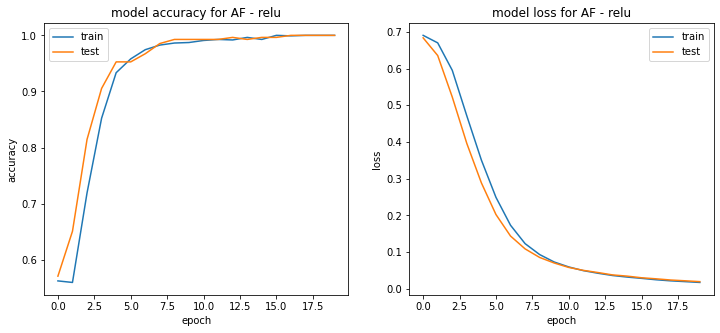

Weights of 1st layer after final epoch 
 [[ 0.28117523 -0.5608195   0.35213843 -0.30487087]
 [ 0.24280043 -0.16420154  0.23236957 -0.06843141]
 [ 0.3348945   0.07166352  0.3782515  -0.22918983]
 [-0.10354536 -0.01624343 -0.1385433  -0.09158247]] 

Weights of 2nd layer after final epoch 
 [[-0.0218824  -0.13337469 -0.22601402 -0.04976987  0.36960632  0.42352095
   0.3882857   0.30130178]
 [-0.04946666  0.5493548   0.45281985  0.0016916  -0.16443422 -0.22773464
  -0.19520862 -0.21324286]
 [-0.01704835 -0.3027414  -0.27227023 -0.02628436  0.3146663   0.44318002
   0.37717703  0.41387334]
 [-0.00597285  0.5918039   0.5370105  -0.01075221 -0.2601603  -0.31771424
  -0.28564617 -0.2565739 ]] 

Weights of 3rd layer after final epoch 
 [[ 0.04581904 -0.5332743 ]
 [-1.3388835  -0.00290478]
 [-0.6476272   0.70961165]
 [-0.15113975 -0.5844422 ]
 [ 0.5816527  -0.81626165]
 [-0.12697315 -1.059592  ]
 [ 0.38494015 -0.73594177]
 [ 0.51912075 -0.69937426]]


In [3]:
data = bank
out_var = 'class'
input_neurons = 4
hidden_neurons=8
epoch = 20
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [4]:
#importing cancer dataset
cancer = pd.read_csv('Wisconsin Breast Cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#encoding output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
cancer.diagnosis = encod.fit_transform(cancer.diagnosis)
cancer.drop(['id','Unnamed: 32'],axis=1,inplace=True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


100%|████████████████████████████████████████████| 7/7 [00:59<00:00,  8.51s/it]


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                992       
_________________________________________________________________
hidden_layer (Dense)         (None, 64)                2112      
_________________________________________________________________
output_layer (Dense)         (None, 2)                 130       
Total params: 3,234
Trainable params: 3,234
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is selu with accuracy of 0.9406593441963196
F1_score for model with AF = selu is 0.9290184921763869


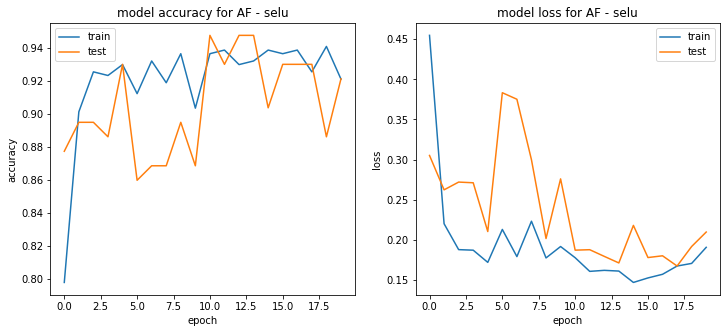

Weights of 1st layer after final epoch 
 [[-9.57003050e-03 -5.64830787e-02 -9.77098383e-03  4.17473651e-02
   2.02688705e-02 -3.85790467e-02 -4.06966731e-02 -3.13708596e-02
   2.82920431e-03 -5.49828485e-02 -5.54459207e-02  7.38181593e-03
  -8.79811402e-03 -2.72100861e-03  3.16104037e-03  4.18755710e-02
   3.57531197e-02  1.80006661e-02  4.18960154e-02 -9.35222395e-03
   1.77427419e-02  2.33077183e-02 -1.65990107e-02  1.54838730e-02
   2.14101169e-02  1.17491167e-02 -6.95091113e-03 -2.65875496e-02
  -3.19324508e-02  3.97051200e-02  1.88259669e-02  3.32902260e-02]
 [-2.58373655e-02 -1.22066028e-02  1.52093628e-02 -2.92860232e-02
   4.43961211e-02  9.21725668e-03 -4.12362209e-03  2.46203858e-02
   3.35178077e-02  7.71139096e-03 -5.15146591e-02 -1.05648860e-02
   4.26218621e-02  5.22414856e-02 -2.00744416e-03 -4.60014679e-02
  -5.21974154e-02  2.79800277e-02 -2.67078001e-02 -1.16100796e-02
  -5.34154736e-02  8.88931192e-03 -2.35914178e-02  2.27105357e-02
  -6.28088787e-02  3.91586199e-02 

In [6]:
data = cancer
out_var = 'diagnosis'
input_neurons = 32
hidden_neurons=64
epoch = 20
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [7]:
#importing iris dataset
iris = pd.read_csv('iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#encoding output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
iris.Species = encod.fit_transform(iris.Species)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


100%|████████████████████████████████████████████| 7/7 [01:11<00:00, 10.26s/it]


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                320       
_________________________________________________________________
hidden_layer (Dense)         (None, 300)               19500     
_________________________________________________________________
output_layer (Dense)         (None, 3)                 903       
Total params: 20,723
Trainable params: 20,723
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is elu with accuracy of 0.9916666746139526
F1_score for model with AF = elu is 1.0


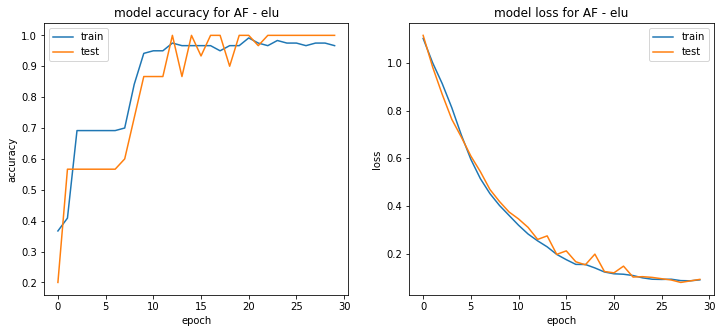

Weights of 1st layer after final epoch 
 [[-0.0298584   0.05211702  0.05548214  0.01796591  0.03197545  0.04085577
   0.00213799  0.03059605  0.05932552  0.00522016  0.00316279  0.05517363
   0.02327538 -0.06291243  0.01832448 -0.02617582 -0.01600041 -0.05112593
   0.05648378  0.00436091  0.02855496 -0.00279545 -0.04895433 -0.02273784
   0.04659947  0.04759123 -0.03487096  0.05421579  0.03670567  0.07802488
   0.01902605 -0.06412017  0.01963005  0.05609118 -0.01596209  0.02064508
   0.04133906  0.00608751 -0.02033379  0.01933319  0.00371027  0.02964855
  -0.04449939 -0.01929916 -0.02236574 -0.01724134 -0.02053926  0.01448526
   0.04323969 -0.05316829  0.05089122 -0.04088129 -0.06323018  0.0458979
  -0.03132844 -0.02568058  0.0239078  -0.04665207  0.05778248 -0.02735596
   0.05304493 -0.04673954 -0.02650022 -0.04999346]
 [ 0.08932634  0.0127706   0.03954909  0.08367524  0.06779625 -0.00657602
  -0.07552573  0.06607805  0.01356459  0.06127708 -0.01027012  0.06490177
   0.03350116 -0.0104

In [9]:
data = iris
out_var = 'Species'
input_neurons = 64
hidden_neurons=300
epoch = 30
batch_size = 32
result = neural_network(data,out_var,input_neurons,hidden_neurons,epoch,batch_size)

In [12]:
#creating neural network for MNIST data
import mnist

#importing handwritten images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

#Normalization of images
train_images = train_images/255
test_images = test_images/255

#flatten the images (28*28 = 784)
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))

100%|███████████████████████████████████████████| 7/7 [22:51<00:00, 195.98s/it]


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
hidden_layer (Dense)         (None, 128)               8320      
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
None
Best Activation function is tanh with accuracy of 0.9970666766166687
F1_score for model with AF = tanh is 0.9760984952933026


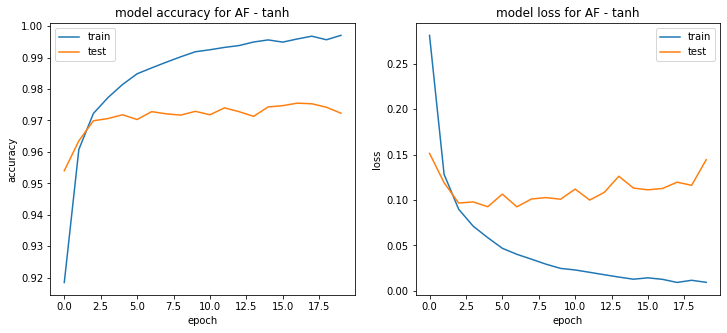

Weights of 1st layer after final epoch 
 [[-0.01033998 -0.00945219  0.02490226 ... -0.0423332  -0.00766804
  -0.0324096 ]
 [ 0.03087485  0.02885341 -0.04594373 ...  0.00977205  0.0429596
  -0.0452119 ]
 [ 0.01744938 -0.00610518  0.02887145 ... -0.02016266  0.04554352
  -0.04987389]
 ...
 [-0.00954981  0.02426537 -0.02927505 ...  0.01586406 -0.00068497
  -0.02032374]
 [ 0.04506302 -0.00839246 -0.02278125 ... -0.02999433  0.01273027
  -0.02325761]
 [-0.03047135 -0.02476058  0.04170469 ...  0.03056986  0.01983657
  -0.01696923]] 

Weights of 2nd layer after final epoch 
 [[-0.00604135 -0.31643638 -0.08009267 ...  0.09129113 -0.01439968
   0.10327862]
 [-0.35551482 -0.06550274 -0.3105524  ... -0.08402404  0.30638155
  -0.15083183]
 [-0.11557462  0.00987811 -0.10812593 ... -0.19827703 -0.01435898
  -0.16790007]
 ...
 [ 0.04071597  0.01512128 -0.02527307 ...  0.12561527 -0.4057225
  -0.34966478]
 [ 0.00424037 -0.09231107  0.19933851 ...  0.11917701  0.30470726
  -0.31506667]
 [ 0.08962103 -0

In [11]:
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels
input_neurons = 64
hidden_neurons=128
epoch = 20
batch_size = 32
result = neural_network_model(x_train,x_test,y_train,y_test,input_neurons,hidden_neurons,epoch,batch_size)